In [93]:
# !pip install -U kaleido

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import random

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

from xgboost import XGBClassifier
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [94]:
# Computer
df = pd.read_csv("C:\\Users\\Merlijne\\Documents\\Studie\\Scriptie\\dataset1_combined.csv")
df["Series"] = df["Series"].str.strip()
df.head()

df.describe().T
df.describe().T.to_csv('describe_transposed.csv')

In [95]:
# Modifying the data

df["timestamp"] = pd.to_datetime(df["Time"])
df["Time"] = pd.to_datetime(df["Time"])
df["hour"] = df["timestamp"].dt.hour
df["minute"] = df["timestamp"].dt.minute
df["dayofweek"] = df["timestamp"].dt.dayofweek  # Maandag = 0, Zondag = 6
df["time_minute_of_day"] = df["hour"] * 60 + df["minute"]  # optioneel
df["date"] = df["timestamp"].dt.date
df['Series_num'] = df['Series'].apply(lambda x: int(x[-3:]))

# Actual needed
df['Seconds_since_midnight'] = df['Time'].dt.hour * 3600 + df['Time'].dt.minute * 60 + df['Time'].dt.second
df["date"] = df["timestamp"].dt.date

df.describe().T

,count,mean,min,25%,50%,75%,max,std
Time,2748525,2019-02-17 04:14:51.699729408,2018-10-09 11:20:00,2018-12-14 05:00:00,2019-02-20 09:50:00,2019-04-21 05:20:00,2019-06-20 10:00:00,NaN
CPU_Load,2748440.0,10.35987,0.0,0.6955,1.973333,17.0345,68.362667,14.212217
Power,2748442.0,205.582442,55.866667,160.933333,176.0,245.066667,448.0,65.552486
Network_RX,2748442.0,2875071.981369,0.0,43322.249468,63943.551305,324687.59361,1065749472.91208,17711473.047055
Network_TX,2748439.0,2286192.114021,0.0,59063.382818,152580.250156,641796.03051,1124093365.304173,14662478.159418
Inlet_Temperature,2664726.0,17.738659,4.0,17.0,18.1,19.866667,25.75,3.668756
CPU1_Temperature,2748439.0,57.007875,29.148148,48.616667,55.516667,64.533333,82.016667,11.063172
CPU2_Temperature,2748434.0,48.297562,25.466667,41.066667,47.1,54.916667,77.95,8.792395
Fan_speed1,2664725.0,8804.386699,280.0,7354.666667,9101.166667,10470.833333,13913.666667,2687.122327
Fan_speed2,2664726.0,8820.23756,280.0,7381.5,9111.666667,10500.0,13941.666667,2686.208161


In [96]:
# One server

rcc120 = df[
    (df["Series"] == "qh2-rcc120") &
    (df["date"] < datetime.date(2018, 10, 10))]


# fig = px.scatter(
#     rcc120, x='timestamp', y='CPU_Load', opacity=0.65,
#     trendline='ols', trendline_color_override='darkblue'
# )
# fig.show()

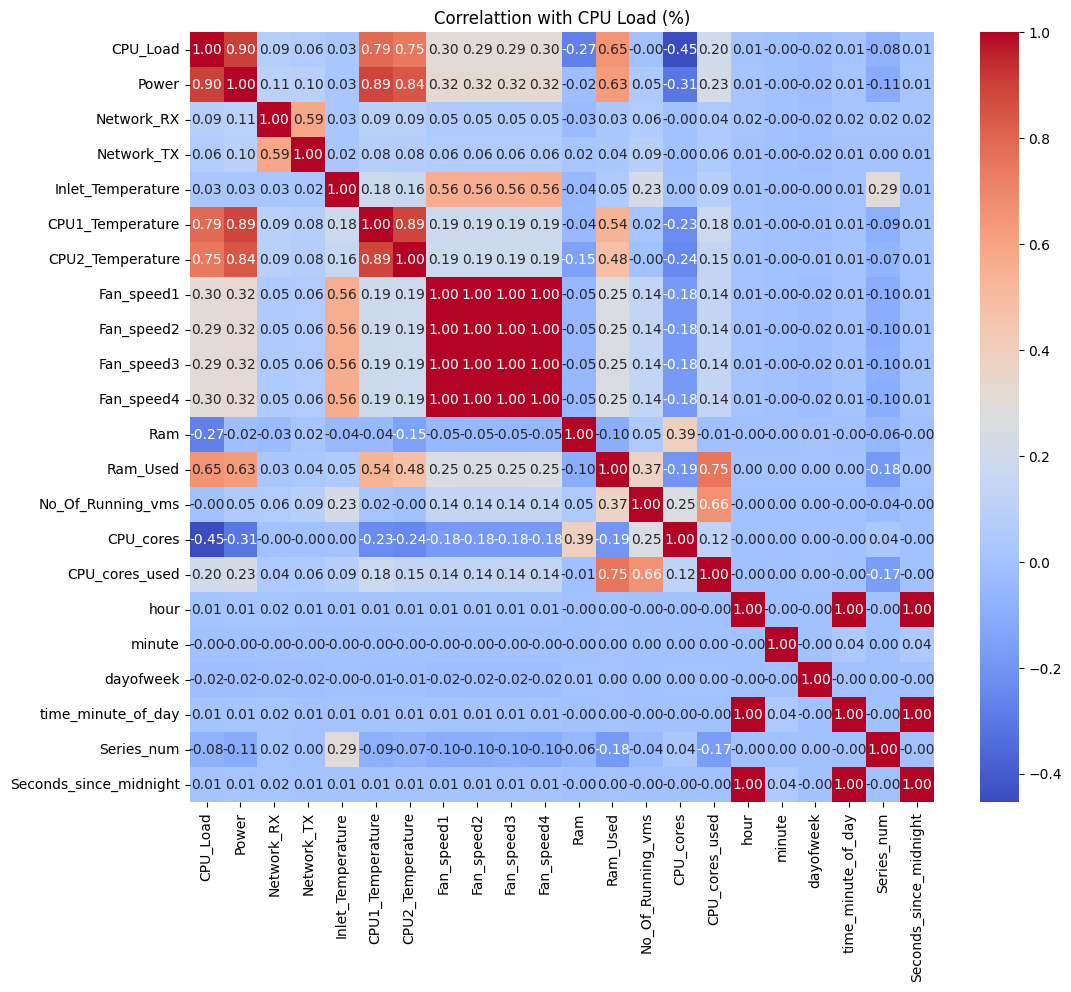

In [97]:
# Correlation


corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlattion with CPU Load (%)")
plt.savefig('correlation_cpu_load.png', dpi=300)


In [98]:
# Dividing training en testing

# test = df[(df["Series_num"] == "120")]

# all_series = sorted(df["Series_num"].unique())

# train_10 = random.sample(list(all_series), 10)
# train = pd.DataFrame()

# for server in train_10:
#     server_data = df[df["Series_num"] == server]
#     train = pd.concat([train, server_data])


# df = df.drop(columns=[
#     "Inlet_Temperature",
#     "Fan_speed1", "Fan_speed2", "Fan_speed3", "Fan_speed4"
# ])



In [99]:

# s = (train.dtypes == 'object')
# object_cols = list(s[s].index)

# s_ = (test.dtypes == 'object')
# object_cols_ = list(s[s].index)

# print("train Categorical variables:")
# print(object_cols)
# print("test Categorical variables:")
# print(object_cols_)

# print(train.shape,test.shape)

In [100]:
# df = train.copy()

# low_percentile = train['CPU_Load'].quantile(0.25)
# mid_percentile = train['CPU_Load'].quantile(0.5)
# high_percentile = train['CPU_Load'].quantile(0.75)


# def categorize_cpu_load(value):
#     if value <= low_percentile:
#         return 0
#     elif value > low_percentile and value <= mid_percentile:
#         return 1
#     elif value > mid_percentile and value <= high_percentile:
#         return 2
#     elif value > high_percentile:
#         return 3
#     else:
#         return 4


# df['CPU_Load_Category'] = df['CPU_Load'].apply(categorize_cpu_load)


In [101]:
# unknown_values = df[(df['CPU_Load_Category'] == 4)]
# print(unknown_values)

# df = df[df['CPU_Load_Category'] != 'unknown']

In [102]:


X = df[["Series_num", "Seconds_since_midnight", 
        "CPU1_Temperature","CPU2_Temperature",
        "Ram_Used", "Power"]]

y = df["CPU_Load"]

X = X.fillna(X.median())
y = y.fillna(y.median())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("split completed")


print("time for model")
model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
model.fit(X_train, y_train)


print("model ready")


split completed
time for model
model ready


In [103]:
# voorspellen en evalueren
y_pred = model.predict(X_test)
print(X_test)
mse = mean_squared_error(y_test, y_pred)

# Neem de wortel ervan om RMSE te krijgen
rmse = np.sqrt(mse)
print(f"Validation RMSE: {rmse:.3f}")

r2 = r2_score(y_test, y_pred)
print(f"R²-score: {r2:.3f}")

X_rcc120 = rcc120[["Series_num", "Seconds_since_midnight", 
                   "CPU1_Temperature","CPU2_Temperature",
                   "Ram_Used", "Power"]]

X_rcc120 = X_rcc120.fillna(X_rcc120.median())


y_pred_rcc120 = model.predict(X_rcc120)
rcc120 = rcc120.copy()
rcc120['cpu_fit'] = y_pred_rcc120
print(rcc120['cpu_fit'])

fig = go.Figure()


fig.add_trace(go.Scatter(
    x=rcc120['Time'],
    y=rcc120['CPU_Load'],
    marker=dict(color='#0066cc'),
    name='CPU Load %'
))
fig.add_trace(go.Scatter(
    x=rcc120['Time'],
    y=rcc120['cpu_fit'],

    marker=dict(color='#cc0000'),
    name='Predicted CPU Load %'
))

# lijnstukken tussen echte en voorspelde punten
for i in range(len(rcc120)):
    fig.add_trace(go.Scatter(
        x=[rcc120['Time'].iloc[i], rcc120['Time'].iloc[i]],
        y=[rcc120['CPU_Load'].iloc[i], rcc120['cpu_fit'].iloc[i]],
        mode='lines',
        line=dict(color='#e0e0e0', width=1),
        showlegend=False,
        name='Difference'
    ))

fig.show()
fig.write_image("XGBoost_RCC120.png", scale=2)

         Series_num  Seconds_since_midnight  CPU1_Temperature  \
1812116         140                   82800         58.133333   
2188793         164                   63000         56.683333   
2547443         188                   30600         51.700000   
379646          139                   39600         68.183333   
2725678         199                    6000         65.033333   
...             ...                     ...               ...   
857473          162                   15000         46.183333   
267425          133                   72000         45.600000   
920660          165                   79200         44.950000   
926499          165                   31200         44.116667   
2393593         178                   85800         59.066667   

         CPU2_Temperature  Ram_Used       Power  
1812116         49.350000  21.92675  176.000000  
2188793         47.400000  28.48675  277.466667  
2547443         41.160000  35.14275  160.000000  
379646          56.

In [104]:
X = df[["Series_num", "Seconds_since_midnight"
        ]]

y = df["CPU_Load"]

X = X.fillna(X.median())
y = y.fillna(y.median())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("split completed")


print("time for model")
model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
model.fit(X_train, y_train)


print("model ready")

X_rcc120 = rcc120[["Series_num", "Seconds_since_midnight"]]

X_rcc120 = X_rcc120.fillna(X_rcc120.median())


y_pred_rcc120 = model.predict(X_rcc120)
rcc120 = rcc120.copy()
rcc120['cpu_fit'] = y_pred_rcc120
print(rcc120['cpu_fit'])

fig = go.Figure()


fig.add_trace(go.Scatter(
    x=rcc120['Time'],
    y=rcc120['CPU_Load'],
    marker=dict(color='#0066cc'),
    name='CPU Load %'
))
fig.add_trace(go.Scatter(
    x=rcc120['Time'],
    y=rcc120['cpu_fit'],

    marker=dict(color='#cc0000'),
    name='Predicted CPU Load %'
))

# lijnstukken tussen echte en voorspelde punten
for i in range(len(rcc120)):
    fig.add_trace(go.Scatter(
        x=[rcc120['Time'].iloc[i], rcc120['Time'].iloc[i]],
        y=[rcc120['CPU_Load'].iloc[i], rcc120['cpu_fit'].iloc[i]],
        mode='lines',
        line=dict(color='#e0e0e0', width=1),
        showlegend=False,
        name='Difference'
    ))

fig.show()
fig.write_image("XGBoost_RCC120_V1.png", scale=2)

split completed
time for model
model ready
0     11.343727
1     11.186000
2     11.176149
3     11.216061
4     11.325065
        ...    
71    12.239006
72    12.030444
73    12.402158
74    12.411856
75    12.250421
Name: cpu_fit, Length: 76, dtype: float32


In [ ]:



df['Time'] = pd.to_datetime(df['Time'])


print(len(rcc120))

df = rcc120.copy()
df.dropna(subset=['CPU_Load', 'Power'], inplace = True)


# Time 
df['Time'] = pd.to_datetime(df['Time'])
print(len(df.Time))
df['Seconds_since_midnight'] = df['Time'].dt.hour * 3600 + df['Time'].dt.minute * 60 + df['Time'].dt.second
print(len(df.Seconds_since_midnight))
X = df.Seconds_since_midnight.values.reshape(-1, 1)


model = LinearRegression()
model.fit(X, df.CPU_Load)

time_range = np.linspace(0, 86400, 100).reshape(-1, 1)  # van 00:00 tot 23:59 in seconden
cpu_pred = model.predict(time_range)
base_date = pd.Timestamp("2018-10-09")
time_labels = [base_date + pd.Timedelta(seconds=s[0]) for s in time_range]
print(len(cpu_pred))
df['cpu_fit'] = model.predict(df['Seconds_since_midnight'].values.reshape(-1, 1))

print(df[["cpu_fit", "CPU_Load", "Time"]])


fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df['Time'],
    y=df['CPU_Load'],
    mode='markers',
    marker=dict(color='#0066cc'),  
    name='CPU Load'
))
fig.add_trace(go.Scatter(
    x=df['Time'],
    y=df['cpu_fit'],
    marker=dict(color='#cc0000'),  # rood via rgb
    name='Regression Fit'
))

fig.show()


fig.write_image("Linear_RCC120.png", scale=2)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Validation RMSE: {rmse:.3f}")
r2 = r2_score(y_test, y_pred)
print(f"R²-score: {r2:.3f}")


76
76
76
100
     cpu_fit  CPU_Load                Time
0   3.772432  3.468500 2018-10-09 11:20:00
1   3.831272  3.622833 2018-10-09 11:30:00
2   3.890112  3.414500 2018-10-09 11:40:00
3   3.948952  3.332500 2018-10-09 11:50:00
4   4.007792  3.364000 2018-10-09 12:00:00
..       ...       ...                 ...
71  7.950072  7.461833 2018-10-09 23:10:00
72  8.008912  7.317500 2018-10-09 23:20:00
73  8.067752  7.336667 2018-10-09 23:30:00
74  8.126592  7.323167 2018-10-09 23:40:00
75  8.185432  7.067333 2018-10-09 23:50:00

[76 rows x 3 columns]


ValueError: Found input variables with inconsistent numbers of samples: [19, 76]

In [ ]:
X = df.Seconds_since_midnight.to_numpy()[:, None]
X_train, X_test, y_train, y_test = train_test_split(X, df.CPU_Load, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X.min(), X.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show()

In [ ]:
y = df.CPU_Load

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

fig = px.scatter(x=y, y=y_pred, labels={'x': 'ground truth', 'y': 'prediction'})
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()